In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,2].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_Y = StandardScaler()

X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1,1))

In [7]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, np.ravel(Y,order='C'))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

In [9]:
y_pred

array([170370.0204065])

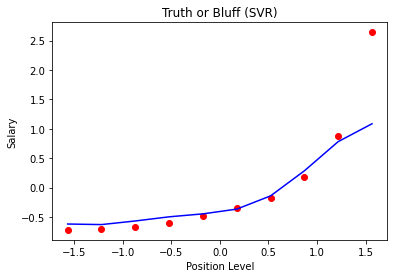

In [10]:
# Visualising the SVR results

plt.scatter(X,Y, color = 'red')
plt.plot(X,regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

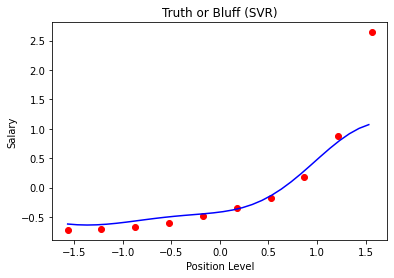

In [13]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid)),1)

plt.scatter(X,Y, color = 'red')
plt.plot(X_grid,regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()